# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

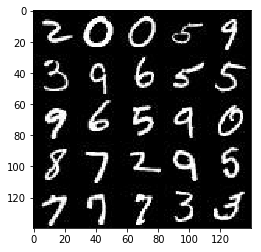

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

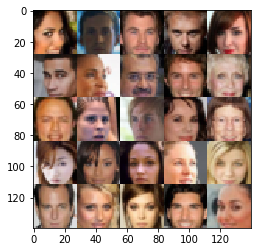

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #print (type(image_width))
    #print (type(image_height))
    #print (type(image_channels))
    #print (type(z_dim))
    #print (z_dim)
    
    input_images = tf.placeholder(tf.float32, shape=[None,image_width,image_height,image_channels], name='input_images')
    #input_images = tf.placeholder(tf.float32, shape=[None,z_dim], name='input_images')
    z_data = tf.placeholder(tf.float32,shape=[None,z_dim],name='z_data')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')

    return (input_images,z_data,learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #print (type(images))
    #shape = images.get_shape().as_list()
    #print(shape)
    alpha=0.2
    with tf.variable_scope('discriminator', reuse=reuse):
    # Input layer is 28x28x3
        layer1 = tf.layers.conv2d(images, 64, 4, strides=2, padding='same')
        #print (layer1.get_shape().as_list())
        relu1 = tf.maximum(alpha * layer1, layer1)
        # 14x14x64
        
        layer2 = tf.layers.conv2d(relu1, 128, 4, strides=1, padding='same')
        #print (layer2.get_shape().as_list())
        bn2 = tf.layers.batch_normalization(layer2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 14x14x128
        
        layer3 = tf.layers.conv2d(relu2, 256, 4, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(layer3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        #print (layer3.get_shape().as_list())
        # 7x7x256
        
        layer4 = tf.layers.conv2d(relu3, 512, 4, strides=1, padding='same')
        bn4 = tf.layers.batch_normalization(layer4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        #print (layer4.get_shape().as_list())
        # 7x7x512
        
        layer5 = tf.layers.conv2d(relu4, 1024, 4, strides=2, padding='same')
        bn5 = tf.layers.batch_normalization(layer4, training=True)
        relu5 = tf.maximum(alpha * bn5, bn5)
        #print (layer5.get_shape().as_list())
        # 4x4x1024


        # Flatten it
        flat = tf.reshape(relu5, (-1, 4*4*1024))
        #print (flat.get_shape().as_list())
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        #print (out.get_shape().as_list())


    return (out,logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    #print (type(z))
    #print (type(out_channel_dim))
    #print (z.get_shape().as_list()[-1])
    #print (out_channel_dim)
    alpha=0.2
    #if is_train==True:
        #reuse=False
    #else:
        #reuse=True
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        layer0 = tf.layers.dense(z, 4*4*1024)
        # Reshape it to start the convolutional stack
        layer0 = tf.reshape(layer0, (-1, 4, 4, 1024))
        layer0 = tf.layers.batch_normalization(layer0, training=is_train)
        layer0 = tf.maximum(alpha * layer0, layer0)
        # 4x4x1024 now
        
        layer1 = tf.layers.conv2d_transpose(layer0, 512, 4, strides=1, padding='valid')
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        # 7x7x512 now
        
        
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 4, strides=1, padding='same')
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
        # 7x7x256 now
        
        layer3 = tf.layers.conv2d_transpose(layer2, 128, 4, strides=2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(alpha * layer3, layer3)
        #print (layer3.get_shape().as_list())
        # 14x14x128 now
        
        layer4 = tf.layers.conv2d_transpose(layer3, 64, 4, strides=1, padding='same')
        layer4 = tf.layers.batch_normalization(layer4, training=is_train)
        layer4 = tf.maximum(alpha * layer4, layer4)
        #print (layer4.get_shape().as_list())
        # 14x14x64 now

        
        # Output layer
        logits = tf.layers.conv2d_transpose(layer4, out_channel_dim, 4, strides=2, padding='same')
        #print (logits.get_shape().as_list())
        # 28x28x3 now
        
        out = tf.tanh(logits) 
        out = out
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_real_out, d_real_logits = discriminator(input_real, reuse=False)
    d_fake_out, d_fake_logits = discriminator(g_model, reuse=True)
    
    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits, labels=tf.ones_like(d_real_logits)*(1 - smooth)))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=tf.zeros_like(d_fake_logits)))
    g_loss      = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=tf.ones_like(d_fake_logits)))
    
    d_loss = d_real_loss + d_fake_loss
    return (d_loss , g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    all_vars = tf.trainable_variables()
    d_vars = [var for var in all_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in all_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_opt=tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_opt=tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    return (d_opt,g_opt)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [14]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    print ("image_mode{}:".format(data_image_mode))
    print ("data_shape{}:".format(data_shape))
    input_real,input_z,learn_rate = model_inputs(data_shape[1] , data_shape[2] , data_shape[3] , z_dim)
    d_loss , g_loss = model_loss(input_real , input_z, data_shape[3])
    d_opt , g_opt = model_opt(d_loss,g_loss,learn_rate,beta1)
    
    if data_shape[3] == 1:
        print("dataset_length:{}".format(data_shape[0]))
        plot_show_every = 400
        loss_show_every = 80
    else:
        print("dataset_length:{}".format(data_shape[0]))
        plot_show_every = 1600
        loss_show_every = 400

    
    print('model built')
    
    with tf.Session() as sess:
        print ('starting training')
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            print("current_epoch:{}".format(epoch_i))
            batch_step = 1
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                #print('running opt')
                batch_images = batch_images * 2.0
                batch_z = np.random.uniform(-1 , 1 , size=[batch_size,z_dim])
                _ =sess.run(d_opt, feed_dict={input_real:batch_images , input_z:batch_z, learn_rate:learning_rate})
                _ =sess.run(g_opt, feed_dict={input_z:batch_z, input_real:batch_images , learn_rate:learning_rate})
                #_ =sess.run(d_opt, feed_dict={input_real:batch_images , input_z:batch_z, learn_rate:learning_rate})
                _ =sess.run(g_opt, feed_dict={input_z:batch_z, input_real:batch_images , learn_rate:learning_rate})

                
                #print("Batch_step:{}".format(batch_step))
                if batch_step % plot_show_every == 0:
                    n_images = 25
                    show_generator_output(sess, n_images, input_z, data_shape[3], data_image_mode)
                    
                if batch_step % loss_show_every == 0:
                    train_loss_d=d_loss.eval({input_z: batch_z , input_real: batch_images})
                    train_loss_g=g_loss.eval({input_z: batch_z})
                    print("EPOCH:{}".format(epoch_i),
                          "D_loss:{:.4f}".format(train_loss_d),
                          "G_loss:{:.4f}".format(train_loss_g))
                    
                batch_step += 1 
        
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

image_modeL:
data_shape(60000, 28, 28, 1):
dataset_length:60000
model built
starting training
current_epoch:0
EPOCH:0 D_loss:3.2200 G_loss:0.0777
EPOCH:0 D_loss:2.0102 G_loss:0.3301
EPOCH:0 D_loss:1.5508 G_loss:0.5366
EPOCH:0 D_loss:1.3632 G_loss:0.7033


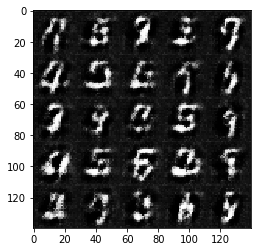

EPOCH:0 D_loss:1.3917 G_loss:0.7073
EPOCH:0 D_loss:1.2946 G_loss:0.7611
EPOCH:0 D_loss:1.2434 G_loss:0.8037
EPOCH:0 D_loss:1.2657 G_loss:0.7716
EPOCH:0 D_loss:1.2384 G_loss:0.8544


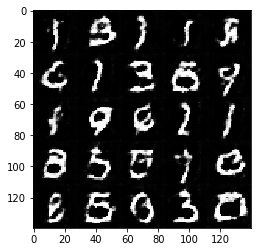

EPOCH:0 D_loss:1.2460 G_loss:0.8753
EPOCH:0 D_loss:1.3040 G_loss:0.6095
EPOCH:0 D_loss:1.4172 G_loss:0.6384
EPOCH:0 D_loss:1.3343 G_loss:1.1219
EPOCH:0 D_loss:1.2196 G_loss:0.9545


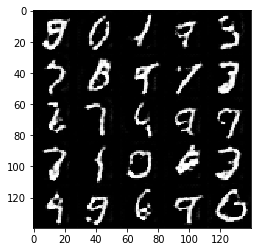

EPOCH:0 D_loss:1.4390 G_loss:0.5584
EPOCH:0 D_loss:1.3746 G_loss:0.7487
EPOCH:0 D_loss:1.2685 G_loss:0.9407
EPOCH:0 D_loss:1.4161 G_loss:0.6032
EPOCH:0 D_loss:1.2493 G_loss:0.7397


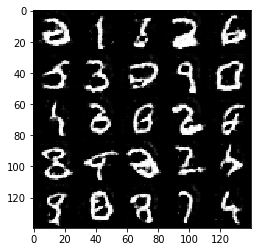

EPOCH:0 D_loss:1.3111 G_loss:0.8664
EPOCH:0 D_loss:1.2927 G_loss:0.6705
EPOCH:0 D_loss:1.3087 G_loss:0.6826
EPOCH:0 D_loss:1.3592 G_loss:0.6553
current_epoch:1
EPOCH:1 D_loss:1.4393 G_loss:0.5479
EPOCH:1 D_loss:1.3539 G_loss:0.5902
EPOCH:1 D_loss:1.2860 G_loss:0.8307
EPOCH:1 D_loss:1.3426 G_loss:0.6154


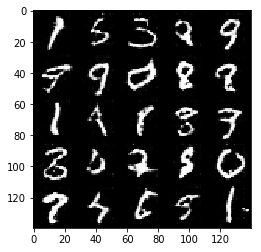

EPOCH:1 D_loss:1.3642 G_loss:0.5481
EPOCH:1 D_loss:1.2870 G_loss:0.7484
EPOCH:1 D_loss:1.2611 G_loss:0.7475
EPOCH:1 D_loss:1.4298 G_loss:0.5176
EPOCH:1 D_loss:1.3842 G_loss:0.9495


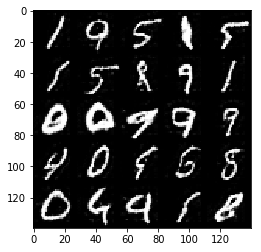

EPOCH:1 D_loss:1.4238 G_loss:0.7053
EPOCH:1 D_loss:1.3147 G_loss:0.7021
EPOCH:1 D_loss:1.3899 G_loss:0.5805
EPOCH:1 D_loss:1.4142 G_loss:0.5571
EPOCH:1 D_loss:1.3618 G_loss:0.5375


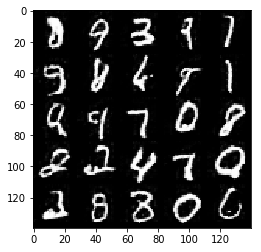

EPOCH:1 D_loss:1.3218 G_loss:1.0083
EPOCH:1 D_loss:1.3494 G_loss:0.9304
EPOCH:1 D_loss:1.3594 G_loss:1.0534
EPOCH:1 D_loss:1.4208 G_loss:0.6435
EPOCH:1 D_loss:1.3063 G_loss:0.7547


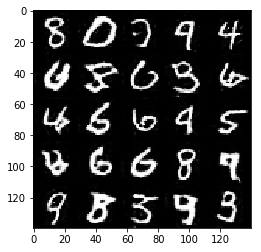

EPOCH:1 D_loss:1.3534 G_loss:0.6208
EPOCH:1 D_loss:1.3362 G_loss:0.7710
EPOCH:1 D_loss:1.4044 G_loss:0.5534
EPOCH:1 D_loss:1.5869 G_loss:0.6815


In [16]:
batch_size = 32
z_dim = 32
learning_rate = 0.0001
beta1= 0.5
#beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
    

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

image_modeRGB:
data_shape(202599, 28, 28, 3):
dataset_length:202599
model built
starting training
current_epoch:0
EPOCH:0 D_loss:1.3348 G_loss:0.8507
EPOCH:0 D_loss:1.3955 G_loss:0.6126
EPOCH:0 D_loss:1.2890 G_loss:0.9251


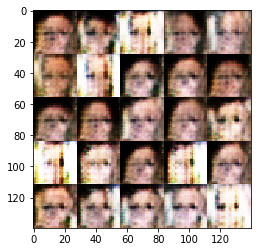

EPOCH:0 D_loss:1.3443 G_loss:1.0521
EPOCH:0 D_loss:1.3312 G_loss:0.8100
EPOCH:0 D_loss:1.3078 G_loss:0.8119
EPOCH:0 D_loss:1.3719 G_loss:0.7839


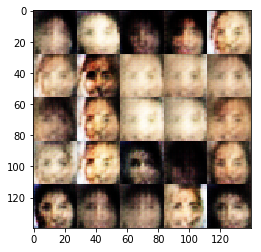

EPOCH:0 D_loss:1.5751 G_loss:0.6815
EPOCH:0 D_loss:1.3576 G_loss:0.7626
EPOCH:0 D_loss:1.3614 G_loss:0.9069
EPOCH:0 D_loss:1.2450 G_loss:0.7230


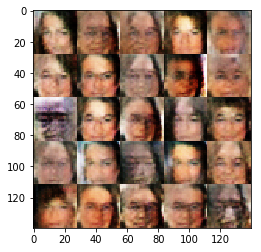

EPOCH:0 D_loss:1.3363 G_loss:0.7559
current_epoch:1
EPOCH:1 D_loss:1.2830 G_loss:0.8407
EPOCH:1 D_loss:1.3992 G_loss:0.8020
EPOCH:1 D_loss:1.2525 G_loss:0.8754


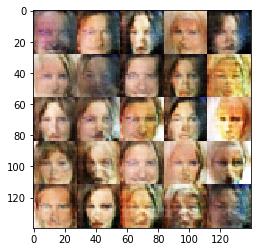

EPOCH:1 D_loss:0.9486 G_loss:1.1651
EPOCH:1 D_loss:1.4007 G_loss:1.1646
EPOCH:1 D_loss:1.2280 G_loss:0.8285
EPOCH:1 D_loss:1.1621 G_loss:1.0420


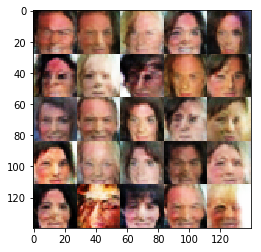

EPOCH:1 D_loss:1.2013 G_loss:0.8943
EPOCH:1 D_loss:1.3099 G_loss:0.7271
EPOCH:1 D_loss:1.5436 G_loss:0.6515
EPOCH:1 D_loss:1.3144 G_loss:0.6204


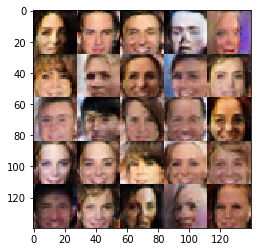

EPOCH:1 D_loss:1.2074 G_loss:0.8736
current_epoch:2
EPOCH:2 D_loss:1.0566 G_loss:0.9031
EPOCH:2 D_loss:1.2539 G_loss:0.6656
EPOCH:2 D_loss:0.7180 G_loss:1.6609


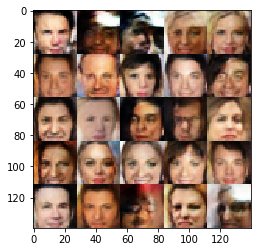

EPOCH:2 D_loss:1.1439 G_loss:1.2732
EPOCH:2 D_loss:1.1536 G_loss:0.9078
EPOCH:2 D_loss:1.3476 G_loss:0.6485
EPOCH:2 D_loss:1.0826 G_loss:0.8870


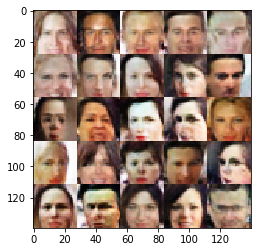

EPOCH:2 D_loss:0.9609 G_loss:1.3175
EPOCH:2 D_loss:1.2109 G_loss:0.9527
EPOCH:2 D_loss:1.1126 G_loss:1.0181
EPOCH:2 D_loss:1.5599 G_loss:0.4558


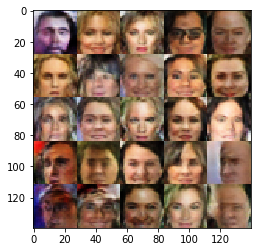

EPOCH:2 D_loss:1.0536 G_loss:0.9297
current_epoch:3
EPOCH:3 D_loss:1.1127 G_loss:0.8110
EPOCH:3 D_loss:1.2508 G_loss:0.6636
EPOCH:3 D_loss:0.8619 G_loss:1.1887


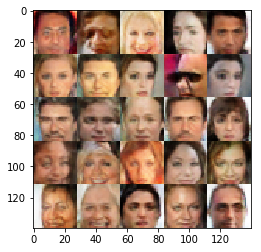

EPOCH:3 D_loss:1.1518 G_loss:1.0622
EPOCH:3 D_loss:1.0772 G_loss:1.0113
EPOCH:3 D_loss:0.7401 G_loss:1.5061
EPOCH:3 D_loss:0.8971 G_loss:1.1233


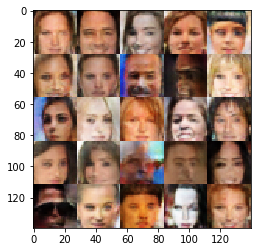

EPOCH:3 D_loss:0.7703 G_loss:1.3564
EPOCH:3 D_loss:0.7012 G_loss:1.8511
EPOCH:3 D_loss:1.1915 G_loss:0.9513
EPOCH:3 D_loss:0.8538 G_loss:1.1422


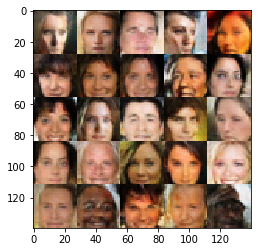

EPOCH:3 D_loss:0.8713 G_loss:1.8662


In [18]:
batch_size = 32
#batch_size = 64
z_dim = 32
#z_dim = 64
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 4

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.